In [43]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt


In [45]:
df = pd.read_csv('CreditScoring.csv')


# Data preparation


In [48]:
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


lowercase all the column names

In [51]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [53]:
# Dataset column descriptions:

# status: whether the customer managed to pay back the loan (1) or not (2)
# seniority: job experience in years
# home: type of homeownership: renting (1), a homeowner (2), and others
# time: period planned for the loan (in months)
# age: age of the client
# marital: marital status - single (1), married (2), and others
# records: whether the client has any previous records: no (1), yes (2)
# job: type of job - full-time (1), part-time (2), and others
# expenses: how much the client spends per month
# income: how much the client earns per month
# assets: total worth of all the assets of the client
# debt: amount of credit debt
# amount: requested amount of the loan
# price: price of an item the client wants to buy


In [55]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


We repeat the same procedure for all the other columns. First, we’ll do it for the
home column:

In [58]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

Next, let’s do it for the marital, records, and job columns: 


In [61]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [63]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [65]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [67]:
df.head()


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [72]:
#After this, all the categorical variables have strings, not numbers
#Let's look at numberical variables:
df.describe().round()


,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


99999999 indicate missing values. Let's replace it by NaN:



In [75]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [77]:
df.isnull().sum()


status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [79]:
df.describe().round()


,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [81]:
df.status.value_counts()


status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [83]:
df = df[df.status != 'unk']


In [85]:
df.isnull().sum()


status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

Now we're ready to prepare the data for training:

First, do train-validation-test split
Then, apply one-hot encoding to categorical features and get the feature matrix

# Split the dataset into train, validation, and test
# Handle missing values.

In [89]:
from sklearn.model_selection import train_test_split


In [91]:
# One-Hot Encoding (الترميز الواحد الساخن):
# نحول القيم الفئوية (مثل نوع السكن أو الوظيفة) إلى أعمدة رقمية منفصلة.
# كل قيمة تتحول إلى عمود يحتوي 1 أو 0، عشان النموذج يفهمها صح.
# نستخدم DictVectorizer من Scikit-learn لهذا الغرض.


In [93]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [95]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [97]:
del df_train['status']
del df_val['status']
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

For OHE, we'll use DictVectorizer



In [100]:
from sklearn.feature_extraction import DictVectorizer


Remember that we have some missing values:



In [103]:
df_train.isnull().sum()


seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       25
assets       30
debt         11
amount        0
price         0
dtype: int64

In [105]:
dict_train = df_train.fillna(0).to_dict(orient='records')
dict_val = df_val.fillna(0).to_dict(orient='records')
dict_train[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [107]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

Now we're ready to train a model. We'll start with decision trees



# Decision trees
We'll use DecisionTreeClassifier and for evaluating the quality of our models, we'll use AUC

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

Let's fit the tree with default parameters



In [115]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

To get the predictions (probabilities), we use predict_proba. Let's check AUC on train data:



In [118]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

And on validation:



In [121]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6540438594366811

That's a case of overfitting - our model on the training data performs perfectly, but fails on validation



Overfitting happens when we have a complex model with enough power to
remember all the training data. If we force the model to be simpler, we can make it
less powerful and improve the model’s ability to generalize.
 We have multiple ways to control the complexity of a tree. One option is to restrict
its size: we can specify the max_depth parameter, which controls the maximum number of levels. The more levels a tree has, the more complex rules it can learn

In [143]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc: 0.705
val auc: 0.669


In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)


0.757780145794483

In [153]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))


   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.756
  10 -> 0.696
  15 -> 0.670
  20 -> 0.655
None -> 0.661


In [155]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747


In [157]:
for m in [4, 5, 6]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    
    print()

depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747

depth: 5
1 -> 0.767
5 -> 0.768
10 -> 0.762
15 -> 0.773
20 -> 0.774
50 -> 0.768
100 -> 0.763
200 -> 0.759

depth: 6
1 -> 0.754
5 -> 0.761
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.770
100 -> 0.776
200 -> 0.768



In [159]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)


0.785470804775859

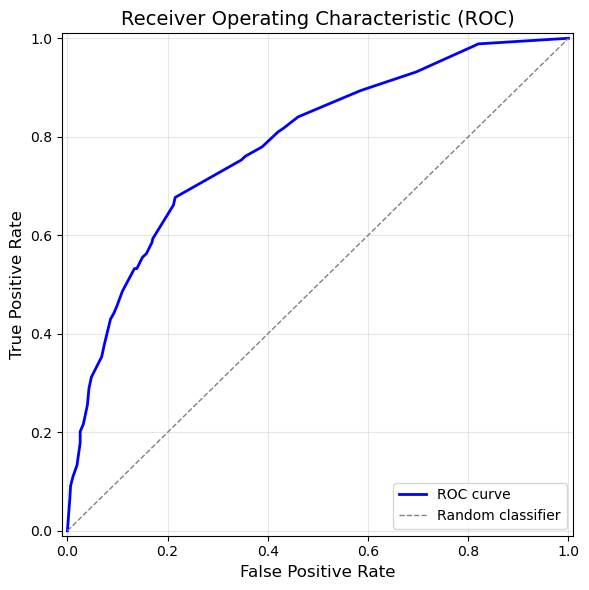

In [163]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)

plt.figure(figsize=(6, 6))

# خط ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')

# الخط الرمادي المائل (baseline)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random classifier')

# تحسين المحاور
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)

# عنوان ووسم
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Random forest


Parameter tuning for decision tree
The process of finding the best set of parameters is called parameter tuning. We usually
do it by changing the model and checking its score on the validation dataset. In the
end, we use the model with the best validation score.
 As we have just learned, we can tune two parameters:
 max_depth
 min_leaf_size

Random Forest = مجموعة من الأشجار (Decision Trees)

كل شجرة تتدرب بشكل مختلف

نجمع نتائجها (أغلب الظن)، وتكون النتيجة النهائية أقوى وأكثر ثبات



شرح آلية تدريب Random Forest.

🚀 كيف يشتغل؟
عندنا Dataset رئيسي.

نختار Subset مختلف من البيانات لكل شجرة.

ندرب كل شجرة Decision Tree بشكل مستقل.

كل شجرة تنتج توقع مستقل.

في الأخير، ندمج كل التوقعات مع بعض (غالبًا باستخدام الأغلبية - majority vote).



| المفهوم             | الشرح                                                     |
| ------------------- | --------------------------------------------------------- |
| **Ensemble**        | مجموعة من النماذج تشتغل مع بعض وتدمج تنبؤاتها             |
| **Bagging**         | تدريب كل نموذج على **عينة مختلفة عشوائيًا** من البيانات   |
| **Random Subspace** | تدريب كل نموذج على **مجموعة فرعية من الخصائص (features)** |
| **Random Forest**   | يستخدم كل من Bagging و Random Subspace                    |


In [191]:
from sklearn.ensemble import RandomForestClassifier



In [193]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)


0.7789379041437602

In [195]:
#If we repeat one more time - it changes:

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7918220677629508

#The reason for this is randomization: to train a tree, we randomly select a subset
#of features. To make the results consistent, we need to fix the seed for the randomnumber generator by assigning some value to the random_state parameter:
To understand how much it changes, we can repeat it 100 times and look at the mean and the standard deviation



In [200]:
aucs = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print('%.3f +- %.3f' % (auc_mean, auc_std))
print('%.3f -- %.3f' % (auc_mean -  auc_std, auc_mean + auc_std))

0.785 +- 0.011
0.774 -- 0.795


# To fix this issue, let's set the seed



In [203]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7811145285897654

In [205]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.781
20 -> 0.801
30 -> 0.813
40 -> 0.815
50 -> 0.816
60 -> 0.817
70 -> 0.818
80 -> 0.818
90 -> 0.820
100 -> 0.819
110 -> 0.819
120 -> 0.821
130 -> 0.822
140 -> 0.822
150 -> 0.820
160 -> 0.820
170 -> 0.819
180 -> 0.820
190 -> 0.820
200 -> 0.820


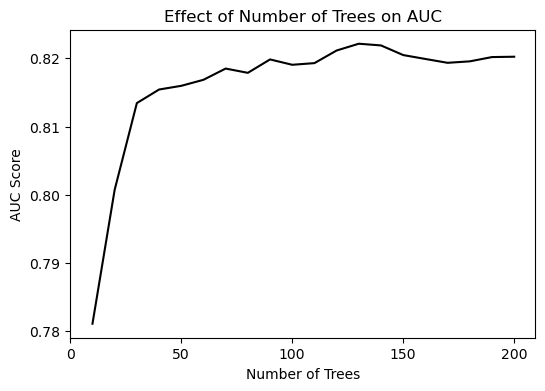

In [207]:

plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')

plt.xticks(range(0, 201, 50))

plt.title('Effect of Number of Trees on AUC')
plt.xlabel('Number of Trees')
plt.ylabel('AUC Score')

plt.show()



Tuning the min_samples_leaf parameter



In [221]:
# Make a dictionary to store AUC scores for each min_samples_leaf value
all_aucs = {}

# Try different values for min_samples_leaf: 3, 5, and 10
for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)

    # List to save AUC scores for different number of trees
    aucs = []

    # Try different numbers of trees from 10 to 200 (step 20)
    for i in range(10, 201, 20):
        # Create and train the random forest model
        rf = RandomForestClassifier(
            n_estimators=i,       # how many trees
            max_depth=10,         # how deep the trees can go
            min_samples_leaf=m,   # minimum samples in a leaf
            random_state=1        # keep it consistent
        )
        rf.fit(X_train, y_train)

        # Get prediction probabilities
        y_pred = rf.predict_proba(X_val)[:, 1]

        # Calculate AUC score
        auc = roc_auc_score(y_val, y_pred)

        # Print number of trees and AUC
        print('%s -> %.3f' % (i, auc))

        # Save AUC to the list
        aucs.append(auc)

    # Save the list of AUCs for this min_samples_leaf
    all_aucs[m] = aucs

# Show all results
print(all_aucs)


min_samples_leaf: 3
10 -> 0.811
30 -> 0.823
50 -> 0.823
70 -> 0.822
90 -> 0.823
110 -> 0.823
130 -> 0.824
150 -> 0.825
170 -> 0.825
190 -> 0.825
min_samples_leaf: 5
10 -> 0.813
30 -> 0.818
50 -> 0.821
70 -> 0.822
90 -> 0.822
110 -> 0.825
130 -> 0.825
150 -> 0.825
170 -> 0.825
190 -> 0.826
min_samples_leaf: 10
10 -> 0.810
30 -> 0.822
50 -> 0.822
70 -> 0.819
90 -> 0.820
110 -> 0.820
130 -> 0.821
150 -> 0.820
170 -> 0.820
190 -> 0.820
{3: [0.8107577922549707, 0.822530938945533, 0.8229365963527162, 0.8215379864861592, 0.8232817078782301, 0.8234027996415685, 0.8244139158654429, 0.8248498462134606, 0.8249588288004649, 0.8251465210336393], 5: [0.8129465258773099, 0.817802305587174, 0.821265530018648, 0.8221979365963527, 0.8224703930638638, 0.8245471168051149, 0.8252857765614783, 0.825031483858468, 0.8248680099779613, 0.8259517812598386], 10: [0.809664939090843, 0.822319028359691, 0.8223795742413602, 0.8193825530987382, 0.820369450969945, 0.8198305926230898, 0.820514761085951, 0.82033917802911

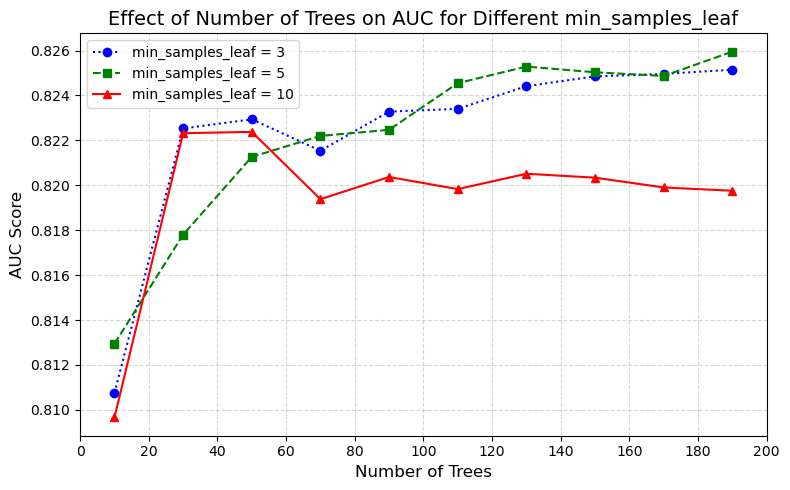

In [222]:
plt.figure(figsize=(8, 5))

num_trees = list(range(10, 201, 20))

# خطوط كل قيمة لـ min_samples_leaf بتنسيقات مختلفة
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf = 3', color='blue', linestyle=':', marker='o')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf = 5', color='green', linestyle='--', marker='s')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf = 10', color='red', linestyle='-', marker='^')

# تحديد مواقع التكرارات على المحور السيني
plt.xticks(range(0, 201, 20))

# عنوان ومحاور
plt.title('Effect of Number of Trees on AUC for Different min_samples_leaf', fontsize=14)
plt.xlabel('Number of Trees', fontsize=12)
plt.ylabel('AUC Score', fontsize=12)

# شبكة وتحسين العرض
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

plt.show()


# Training the final model:



In [225]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [230]:
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)



RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [232]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

0.8253826499721489

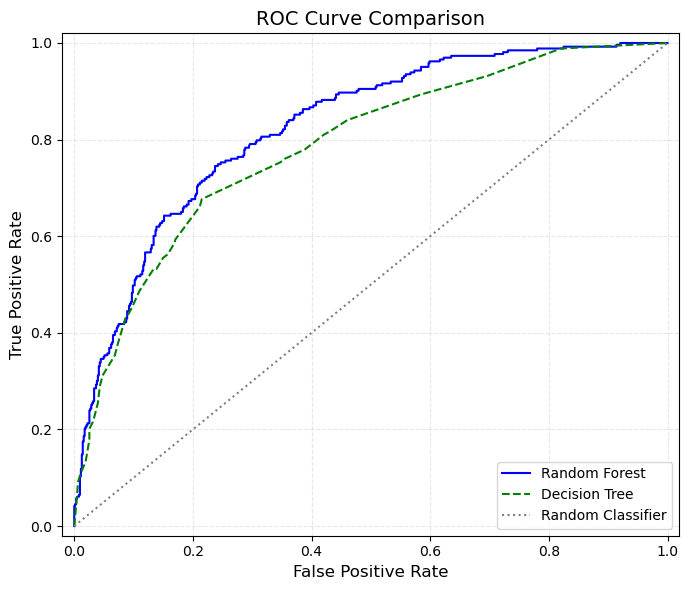

In [238]:

# حساب FPR و TPR لكل نموذج
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_pred_dt)

# إعداد حجم الرسم
plt.figure(figsize=(7, 6))

# رسم منحنى Random Forest
plt.plot(fpr_rf, tpr_rf, color='blue', linestyle='-', label='Random Forest')

# رسم منحنى Decision Tree
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='--', label='Decision Tree')

# الخط الرمادي المرجعي (نموذج عشوائي)
plt.plot([0, 1], [0, 1], color='gray', linestyle=':', label='Random Classifier')

# إعدادات الشكل
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='lower right')

# عرض الرسم
plt.tight_layout()
plt.show()


# "AUC is a metric that tells us how good the model is at separating the positive class from the negative class. For example, in credit scoring, it shows how well the model can tell a customer who will default from one who won't. A perfect model has an AUC of 1.0, and a random guess would give 0.5."





# XGBoost
XGBoost doesn’t come with Anaconda, so to use it, we need to install it. The easiest way is to install it with pip:

In [323]:
!pip install xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [329]:
import xgboost as xgb


In [331]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

When creating an instance of DMatrix, we pass three parameters:
 X_train: the feature matrix
 y_train: the target variable
 feature_names: the names of features in X_train

In [334]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

"""
For us, the most important parameter now is objective: it specifies the learning task.
We’re solving a binary classification problem — that’s why we need to choose binary
logistic. 
 For training an XGBoost model, we use the train function. Let’s start with 10 trees
"""


'\nFor us, the most important parameter now is objective: it specifies the learning task.\nWe’re solving a binary classification problem — that’s why we need to choose binary\nlogistic. \n For training an XGBoost model, we use the train function. Let’s start with 10 trees\n'

In [336]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

"""
We provide three arguments to train:
 xgb_params: the parameters for training
 dtrain: the dataset for training (an instance of DMatrix)
 num_boost_round=10: the number of trees to train
"""

'\nWe provide three arguments to train:\n\uf0a1 xgb_params: the parameters for training\n\uf0a1 dtrain: the dataset for training (an instance of DMatrix)\n\uf0a1 num_boost_round=10: the number of trees to train\n'

In [342]:
y_pred = model.predict(dval)
print(y_pred[:10])


[0.05866029 0.06297418 0.07957753 0.12453752 0.05471457 0.10543569
 0.04962284 0.34493914 0.62430215 0.02429806]


In [344]:
roc_auc_score(y_val, y_pred)


0.8118506454190986

In [346]:
#  Model Performance Monitoring with XGBoost

# To monitor how AUC changes as the number of trees increases, 
# we can use a built-in feature in XGBoost called a "watchlist"

# A watchlist is simply a list of tuples 
# Each tuple contains:
#   - a DMatrix (dataset), 
#   - and a label name (for display during training)

# Example:
watchlist = [(dtrain, 'train'), (dval, 'val')]

# This allows us to track the model's performance on both training and validation sets
# as boosting progresses (tree by tree) 

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

# Cell 4

In [348]:
#overfitting in XGBoost

# At the beginning, both train AUC and val AUC go up, which is good.
# But after some rounds, the train AUC keeps going higher,
# while the val AUC stops improving or even starts going down.

# That means the model is overfitting — it's learning the training data too well,
# but it's not doing better on new data.

# Example:
# round 20: val AUC was 0.81877 (best)
# round 99: val AUC dropped to 0.80838

# So, the model was best around round 20.
# After that, it’s just overfitting.

# To fix this, I can use early stopping.
# This will stop the training automatically if val AUC doesn’t improve for some rounds.

model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=100,
    evals=watchlist,
    early_stopping_rounds=10,  # stop if val AUC doesn't get better for 10 rounds
    verbose_eval=10
)

# Now the model will pick the best round by itself and avoid overfitting.


[0]	train-auc:0.86653	val-auc:0.77999
[10]	train-auc:0.95512	val-auc:0.81115
[20]	train-auc:0.97648	val-auc:0.81877
[28]	train-auc:0.98682	val-auc:0.81649


In [350]:
%%capture output
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=5)



In [352]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [354]:
tree, aucs_train, aucs_val = parse_xgb_output(output)


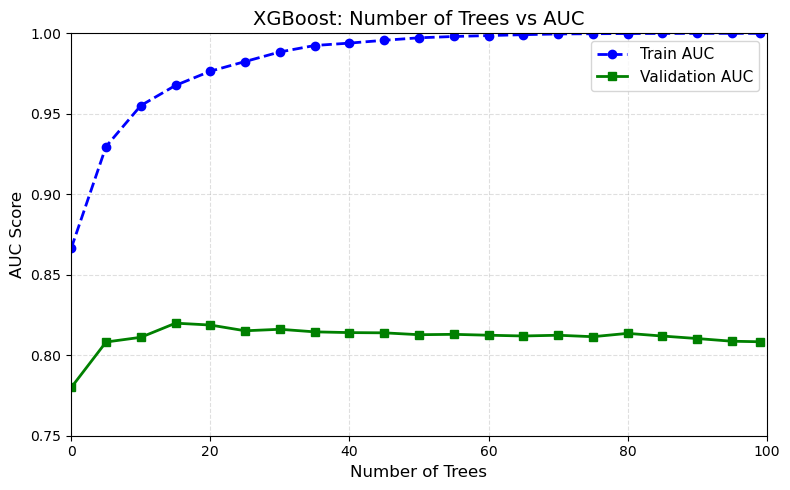

In [356]:
plt.figure(figsize=(8, 5))

plt.plot(tree, aucs_train, color='blue', linestyle='--', linewidth=2, marker='o', label='Train AUC')

plt.plot(tree, aucs_val, color='green', linestyle='-', linewidth=2, marker='s', label='Validation AUC')

plt.xticks(range(0, 101, 20))
plt.xlim(0, 100)
plt.ylim(0.75, 1.0)

plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=11)
plt.title('XGBoost: Number of Trees vs AUC', fontsize=14)
plt.xlabel('Number of Trees', fontsize=12)
plt.ylabel('AUC Score', fontsize=12)

plt.tight_layout()
plt.show()


# Parameter tuning: eta
First, we try to set eta to 0.1

In [384]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [385]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.81877
(0.81877, 20)


In [388]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [389]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.82851
(0.82851, 90)


In [392]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)


In [394]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.829
(0.829, 110)


In [396]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [397]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.82645
(0.82645, 499)


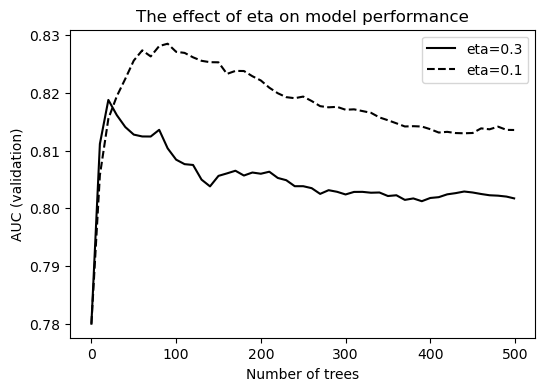

In [400]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')
# plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
# plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta.svg')

plt.show()

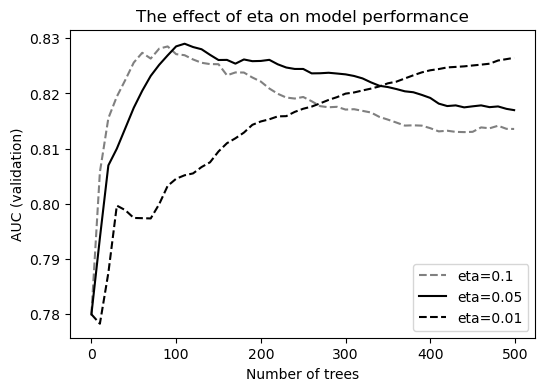

In [402]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_01, color='grey', linestyle='dashed', label='eta=0.1')
plt.plot(tree, aucs_val_eta_005, color='black', linestyle='solid', label='eta=0.05')
plt.plot(tree, aucs_val_eta_001, color='black', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta_2.svg')

plt.show()

In [410]:
#  XGBoost Parameter Tuning (focus on eta)

# eta is learning rate → controls how fast the model learns
# if it's too big (like 0.3) → model learns fast but overfits early
# if it's small (like 0.1 or 0.05) → model learns slower but generalizes better

# when I used eta = 0.3 → best AUC was around 0.817 (early, then dropped)
# with eta = 0.1 → got 0.824 after more trees (around round 60)

# I also tried:
# eta = 0.05 → AUC = 0.829 (took ~120 rounds)
# eta = 0.01 → AUC = 0.82645 but slow and needs more than 500 rounds

# so 0.1 is the best balance between speed and performance

# I’ll use eta = 0.1 and increase num_boost_round to 500


# Parameter tuning: max_depth
First, try 3

In [415]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)


In [417]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.83406
(0.83406, 160)


In [419]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)


In [420]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val))
print(max(zip(aucs_val_depth10, tree)))

0.81993
(0.80768, 290)


With depth=3 it's better than depth=6 and depth=10. So let's try 4 to see if it's better than 3



In [424]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)


In [425]:
tree, _, aucs_val_depth4 = parse_xgb_output(output)
print(max(aucs_val_depth4))
print(max(zip(aucs_val_depth4, tree)))

0.82887
(0.82887, 140)


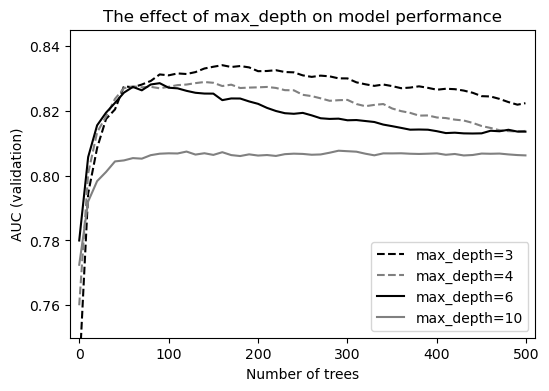

In [428]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_depth3, color='black', linestyle='dashed', label='max_depth=3')
plt.plot(tree, aucs_val_depth4, color='grey', linestyle='dashed', label='max_depth=4')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='solid', label='max_depth=6')
plt.plot(tree, aucs_val_depth10, color='grey', linestyle='solid', label='max_depth=10')

plt.ylim(0.75, 0.845)
plt.xlim(-10, 510)
plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_depth.svg')

plt.show()

It's not better, so we'll leave it at 3



# Tune "min_child_weight"
First, the default value:

In [432]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)


In [433]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.83406
(0.83406, 160)


In [436]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)


In [437]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.83296
(0.83296, 160)


In [440]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)


In [441]:
tree, _, aucs_val_mcw30 = parse_xgb_output(output)
print(max(aucs_val_mcw30))
print(max(zip(aucs_val_mcw30, tree)))

0.83498
(0.83498, 180)


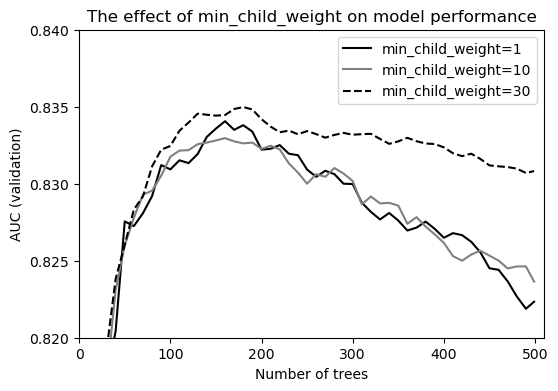

In [444]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw1, color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(tree, aucs_val_mcw10, color='grey', linestyle='solid', label='min_child_weight=10')
plt.plot(tree, aucs_val_mcw30, color='black', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.82, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.82, 0.84, 5))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()


# Checking the best number of trees


In [447]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)


In [448]:
print(output)

[0]	train-auc:0.77610	val-auc:0.73891
[10]	train-auc:0.85036	val-auc:0.79448
[20]	train-auc:0.86898	val-auc:0.80852
[30]	train-auc:0.88186	val-auc:0.81747
[40]	train-auc:0.88961	val-auc:0.82042
[50]	train-auc:0.89673	val-auc:0.82755
[60]	train-auc:0.90252	val-auc:0.82725
[70]	train-auc:0.90859	val-auc:0.82809
[80]	train-auc:0.91216	val-auc:0.82920
[90]	train-auc:0.91623	val-auc:0.83121
[100]	train-auc:0.91922	val-auc:0.83093
[110]	train-auc:0.92290	val-auc:0.83152
[120]	train-auc:0.92517	val-auc:0.83134
[130]	train-auc:0.92785	val-auc:0.83193
[140]	train-auc:0.92981	val-auc:0.83304
[150]	train-auc:0.93222	val-auc:0.83358
[160]	train-auc:0.93392	val-auc:0.83406
[170]	train-auc:0.93624	val-auc:0.83350
[180]	train-auc:0.93804	val-auc:0.83380
[190]	train-auc:0.94029	val-auc:0.83338
[200]	train-auc:0.94222	val-auc:0.83221
[210]	train-auc:0.94401	val-auc:0.83227
[220]	train-auc:0.94496	val-auc:0.83251
[230]	train-auc:0.94650	val-auc:0.83195
[240]	train-auc:0.94824	val-auc:0.83185
[250]	train

In [451]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))


0.83406


In [453]:
max(zip(aucs_val, tree))

(0.83406, 160)

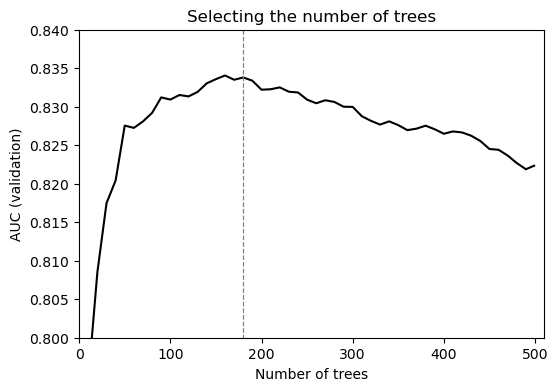

In [455]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val, color='black', linestyle='solid')


plt.ylim(0.80, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.80, 0.84, 9))


plt.vlines(180, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_number_trees.svg')

plt.show()

# Final model



In [458]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=180, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.77610	val-auc:0.73891
[10]	train-auc:0.85036	val-auc:0.79448
[20]	train-auc:0.86898	val-auc:0.80852
[30]	train-auc:0.88186	val-auc:0.81747
[40]	train-auc:0.88961	val-auc:0.82042
[50]	train-auc:0.89673	val-auc:0.82755
[60]	train-auc:0.90252	val-auc:0.82725
[70]	train-auc:0.90859	val-auc:0.82809
[80]	train-auc:0.91216	val-auc:0.82920
[90]	train-auc:0.91623	val-auc:0.83121
[100]	train-auc:0.91922	val-auc:0.83093
[110]	train-auc:0.92290	val-auc:0.83152
[120]	train-auc:0.92517	val-auc:0.83134
[130]	train-auc:0.92785	val-auc:0.83193
[140]	train-auc:0.92981	val-auc:0.83304
[150]	train-auc:0.93222	val-auc:0.83358
[160]	train-auc:0.93392	val-auc:0.83406
[170]	train-auc:0.93624	val-auc:0.83350
[179]	train-auc:0.93792	val-auc:0.83383


In [460]:
y_pred_xgb = model.predict(dval)
roc_auc_score(y_val, y_pred_xgb)

0.8338348550531594

In [468]:
print("y_pred_dt= ", roc_auc_score(y_val, y_pred_dt))
print("y_pred_rf= ",roc_auc_score(y_val, y_pred_rf))
print("y_pred_xgb= ",roc_auc_score(y_val, y_pred_xgb))

y_pred_dt=  0.785470804775859
y_pred_rf=  0.8253826499721489
y_pred_xgb=  0.8338348550531594


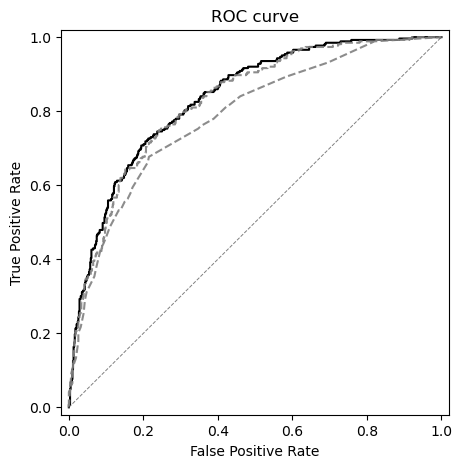

In [470]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_xgb)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

# Final test

In [477]:
y_train_full = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

del df_train_full['status']
del df_test['status']

In [479]:

dict_train_full = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_test)


In [483]:
rf_final = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf_final.fit(X_train_full, y_train_full)

y_pred_rf = rf.predict_proba(X_test)[:, 1]


In [485]:
dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

num_trees = 160

xgb_final = xgb.train(xgb_params, dtrain_full, num_boost_round=num_trees)


In [487]:
y_pred_xgb = xgb_final.predict(dtest)
print(roc_auc_score(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_xgb))

0.8241777039245393
0.8323212452959289


In [497]:
import pickle

with open('dv.pkl', 'wb') as f:
    pickle.dump(dv, f)


In [499]:
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_final, f)


In [503]:
xgb_final.save_model("xgb_model.json")
